In [1]:
from visualize import *
from process import *
import warnings
warnings.filterwarnings("ignore")


# Step 1 - Extracting PDB files from Glycoshape : https://glycoshape.io/ (manual step)
*data are saved in PDB_format_ATOM folders*

# Step 2 - Extracting 3D coordinates from PDB files

In [2]:
df = extract_3D_coordinates("PDB_format_ATOM1/Man(a1-6)[Man(a1-3)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc_cluster0_alpha.PDB.pdb")
df

record_name  atom_number atom_name monosaccharide chain_id  \
0          ATOM            1       HO1            ROH        X   
1          ATOM            2        O1            ROH        X   
2          ATOM            3        C1            NDG        X   
3          ATOM            4        H1            NDG        X   
4          ATOM            5        O5            NDG        X   
..          ...          ...       ...            ...      ...   
135        ATOM          136       H4O            MAN        X   
136        ATOM          137        O3            MAN        X   
137        ATOM          138       H3O            MAN        X   
138        ATOM          139        O2            MAN        X   
139        ATOM          140       H2O            MAN        X   

     residue_number       x       y       z  occupancy  temperature_factor  \
0                 1  15.065  22.823  26.819        1.0                 0.0   
1                 1  15.499  22.159  27.357        1.0                 0.0   
2                 2  15.956  21.642  26.105        1.0                 0.0   
3                 2  15.132  21.057  25.697        1.0                 0.0   
4                 2  16.222  22.741  25.191        1.0                 0.0   
..              ...     ...     ...     ...        ...                 ...   
135               7  29.547  18.696  19.645        1.0                 0.0   
136               7  31.450  19.687  20.370        1.0                 0.0   
137               7  31.519  20.362  19.698        1.0                 0.0   
138               7  31.778  19.247  23.244        1.0                 0.0   
139               7  32.709  19.264  23.011        1.0                 0.0   

    element  
0         H  
1         O  
2         C  
3         H  
4         O  
..      ...  
135       H  
136       O  
137       H  
138       O  
139       H  

[140 rows x 12 columns]

# Step 3 - Creating a distance table between monosaccharides

### Explanations
Coordinates x, y and z of monosaccharides 1..i are compared to coordinates x, y and z of monosaccharides 1..j with i = j = total number of monosaccharide in the analyzed glycan structure. The distance is computed as the sum of the absolute difference between each coordinate : | xi - xj | + | yi - yj | + | zi - zj |

In [3]:
# table containing observed inter-monosaccharide distances
dist_table = make_monosaccharide_contact_table(df,mode='distance')

# table containing observed inter-monosaccharide distances only if closer to each other than 3A
dist_table_closer = make_monosaccharide_contact_table(df,mode='distance',threshold=3)

# table containing 0 or 1 if inter-monosaccharide distance is above or below the default threshold (10A)
binary_table = make_monosaccharide_contact_table(df,mode='binary')


In [4]:
dist_table

1_ROH   2_NDG   3_AFL  4_NAG   5_MAN   6_MAN   7_MAN
0   0.000   2.226   6.544  8.428  11.000  11.000  11.000
1   2.226   0.000   2.562  1.997   7.677  11.000  11.000
2   6.544   2.562   0.000  3.398  11.000  11.000  11.000
3   8.428   1.997   3.398  0.000   2.001   6.934   5.430
4  11.000   7.677  11.000  2.001   0.000   2.063   2.253
5  11.000  11.000  11.000  6.934   2.063   0.000   7.145
6  11.000  11.000  11.000  5.430   2.253   7.145   0.000

In [5]:
dist_table_closer

1_ROH  2_NDG  3_AFL  4_NAG  5_MAN  6_MAN  7_MAN
0  0.000  2.226  4.000  4.000  4.000  4.000  4.000
1  2.226  0.000  2.562  1.997  4.000  4.000  4.000
2  4.000  2.562  0.000  4.000  4.000  4.000  4.000
3  4.000  1.997  4.000  0.000  2.001  4.000  4.000
4  4.000  4.000  4.000  2.001  0.000  2.063  2.253
5  4.000  4.000  4.000  4.000  2.063  0.000  4.000
6  4.000  4.000  4.000  4.000  2.253  4.000  0.000

In [6]:
binary_table

1_ROH  2_NDG  3_AFL  4_NAG  5_MAN  6_MAN  7_MAN
0      0      0      0      0      1      1      1
1      0      0      0      0      0      1      1
2      0      0      0      0      1      1      1
3      0      0      0      0      0      0      0
4      1      0      1      0      0      0      0
5      1      1      1      0      0      0      0
6      1      1      1      0      0      0      0

# Step 4 - Visualizing inter-monosaccharide contact maps

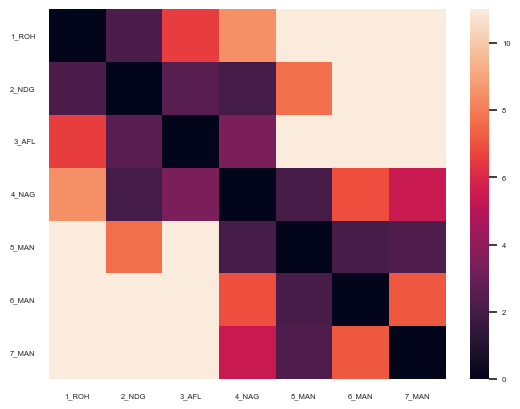

In [7]:
# The closer the darker. Here we see two big squares, representing two parts of the glycan. 
# Each part is in tighter interaction with itself than with the other part.
# They correspond respectively to the "trunk" GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc and the "branches" Man(a1-6)[Man(a1-3)]Man(b1-4) of the glycan respectively
monosaccharide_contact_map(dist_table)

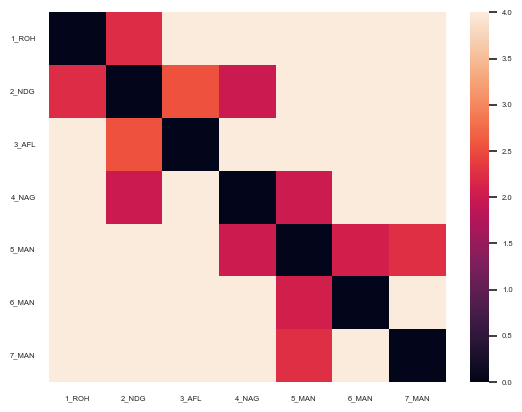

In [8]:
# With a map limited to very close interactions, we can only see binary covalent linkages
monosaccharide_contact_map(dist_table_closer)

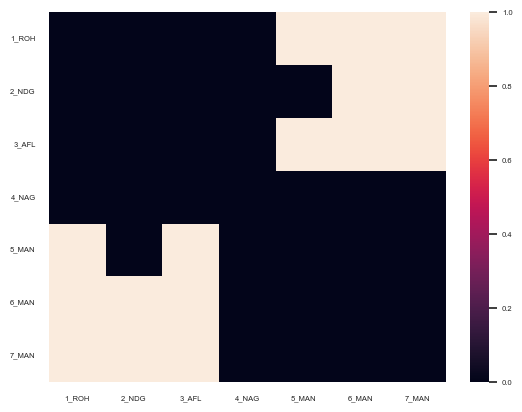

In [9]:
# The binary contact map is just a simplified fingerprint of the interactions, according to a given distance threshold
monosaccharide_contact_map(binary_table)

# Step 5 - Creating a distance table between atoms and visualizing intra- and inter-monosaccharide interactions at the atomic level

### Explanations
Coordinates x, y and z of atoms 1..i are compared to coordinates x, y and z of atoms 1..j with i = j = total number of atoms in the analyzed glycan structure. The distance is computed as the sum of the absolute difference between each coordinate : | xi - xj | + | yi - yj | + | zi - zj |

Distance between atoms from the same monosaccharide can be included (inclusive mode) or ignored and set to 0 (exclusive mode)

In [10]:
# table containing observed inter-atomic distances excluding interactions between atoms from the same monosaccharide
dist_table = make_atom_contact_table(df,mode='exclusive')

# table containing observed inter-atomic distances including interactions between atoms from the same monosaccharide
inclusive_dist_table = make_atom_contact_table(df,mode='inclusive')

# setting a very high-threshold allows to visualize all interatomic relations
all_inclusive_dist_table = make_atom_contact_table(df,mode='inclusive', threshold = 200)

In [11]:
dist_table

1_ROH_HO1_1  1_ROH_O1_2  2_NDG_C1_3  2_NDG_H1_4  2_NDG_O5_5  2_NDG_C5_6  \
0          0.000       0.000       2.786       2.955       2.867       4.365   
1          0.000       0.000       2.226       3.129       3.471       5.133   
2          2.786       2.226       0.000       0.000       0.000       0.000   
3          2.955       3.129       0.000       0.000       0.000       0.000   
4          2.867       3.471       0.000       0.000       0.000       0.000   
..           ...         ...         ...         ...         ...         ...   
135       11.000      11.000      11.000      11.000      11.000      11.000   
136       11.000      11.000      11.000      11.000      11.000      11.000   
137       11.000      11.000      11.000      11.000      11.000      11.000   
138       11.000      11.000      11.000      11.000      11.000      11.000   
139       11.000      11.000      11.000      11.000      11.000      11.000   

     2_NDG_H5_7  2_NDG_C6_8  2_NDG_H62_9  2_NDG_H61_10  ...  7_MAN_H61_131  \
0         3.474       6.509        7.549         6.305  ...           11.0   
1         4.242       7.277        8.317         7.073  ...           11.0   
2         0.000       0.000        0.000         0.000  ...           11.0   
3         0.000       0.000        0.000         0.000  ...           11.0   
4         0.000       0.000        0.000         0.000  ...           11.0   
..          ...         ...          ...           ...  ...            ...   
135      11.000      11.000       11.000        11.000  ...            0.0   
136      11.000      11.000       11.000        11.000  ...            0.0   
137      11.000      11.000       11.000        11.000  ...            0.0   
138      11.000      11.000       11.000        11.000  ...            0.0   
139      11.000      11.000       11.000        11.000  ...            0.0   

     7_MAN_O6_132  7_MAN_H6O_133  7_MAN_O5_134  7_MAN_O4_135  7_MAN_H4O_136  \
0            11.0           11.0          11.0          11.0           11.0   
1            11.0           11.0          11.0          11.0           11.0   
2            11.0           11.0          11.0          11.0           11.0   
3            11.0           11.0          11.0          11.0           11.0   
4            11.0           11.0          11.0          11.0           11.0   
..            ...            ...           ...           ...            ...   
135           0.0            0.0           0.0           0.0            0.0   
136           0.0            0.0           0.0           0.0            0.0   
137           0.0            0.0           0.0           0.0            0.0   
138           0.0            0.0           0.0           0.0            0.0   
139           0.0            0.0           0.0           0.0            0.0   

     7_MAN_O3_137  7_MAN_H3O_138  7_MAN_O2_139  7_MAN_H2O_140  
0            11.0           11.0          11.0           11.0  
1            11.0           11.0          11.0           11.0  
2            11.0           11.0          11.0           11.0  
3            11.0           11.0          11.0           11.0  
4            11.0           11.0          11.0           11.0  
..            ...            ...           ...            ...  
135           0.0            0.0           0.0            0.0  
136           0.0            0.0           0.0            0.0  
137           0.0            0.0           0.0            0.0  
138           0.0            0.0           0.0            0.0  
139           0.0            0.0           0.0            0.0  

[140 rows x 140 columns]

In [12]:
all_inclusive_dist_table

1_ROH_HO1_1  1_ROH_O1_2  2_NDG_C1_3  2_NDG_H1_4  2_NDG_O5_5  2_NDG_C5_6  \
0          0.000       1.636       2.786       2.955       2.867       4.365   
1          1.636       0.000       2.226       3.129       3.471       5.133   
2          2.786       2.226       0.000       1.817       2.279       3.941   
3          2.955       3.129       1.817       0.000       3.280       4.942   
4          2.867       3.471       2.279       3.280       0.000       2.360   
..           ...         ...         ...         ...         ...         ...   
135       25.783      25.223      22.997      22.828      22.916      23.240   
136       25.970      25.410      23.184      23.015      23.103      23.427   
137       26.036      25.476      23.250      23.081      23.169      23.493   
138       23.864      23.304      21.078      20.909      20.997      21.321   
139       25.011      24.451      22.225      22.056      22.144      22.468   

     2_NDG_H5_7  2_NDG_C6_8  2_NDG_H62_9  2_NDG_H61_10  ...  7_MAN_H61_131  \
0         3.474       6.509        7.549         6.305  ...         22.067   
1         4.242       7.277        8.317         7.073  ...         21.507   
2         3.984       6.085        7.125         5.881  ...         19.281   
3         5.801       7.086        8.126         6.882  ...         19.112   
4         3.533       3.806        4.846         3.602  ...         19.200   
..          ...         ...          ...           ...  ...            ...   
135      24.733      23.570       23.920        25.102  ...          5.982   
136      24.920      23.757       24.107        25.289  ...          8.151   
137      24.986      23.823       24.173        25.355  ...          9.567   
138      22.814      21.651       22.001        23.183  ...          7.491   
139      23.961      22.798       23.148        24.330  ...          8.206   

     7_MAN_O6_132  7_MAN_H6O_133  7_MAN_O5_134  7_MAN_O4_135  7_MAN_H4O_136  \
0          22.109         20.788        19.854        24.400         25.783   
1          21.549         20.228        19.294        23.840         25.223   
2          19.323         18.002        17.068        21.614         22.997   
3          19.154         17.833        16.899        21.445         22.828   
4          19.242         17.921        16.987        21.533         22.916   
..            ...            ...           ...           ...            ...   
135         6.792          7.449         5.929         1.383          0.000   
136         8.961          9.618         6.116         3.770          3.619   
137        10.377         11.034         7.084         4.888          3.691   
138         5.975          6.632         4.010         6.532          6.381   
139         7.156          7.813         5.157         7.247          7.096   

     7_MAN_O3_137  7_MAN_H3O_138  7_MAN_O2_139  7_MAN_H2O_140  
0          25.970         26.036        23.864         25.011  
1          25.410         25.476        23.304         24.451  
2          23.184         23.250        21.078         22.225  
3          23.015         23.081        20.909         22.056  
4          23.103         23.169        20.997         22.144  
..            ...            ...           ...            ...  
135         3.619          3.691         6.381          7.096  
136         0.000          1.416         3.642          4.323  
137         1.416          0.000         4.920          5.601  
138         3.642          4.920         0.000          1.181  
139         4.323          5.601         1.181          0.000  

[140 rows x 140 columns]

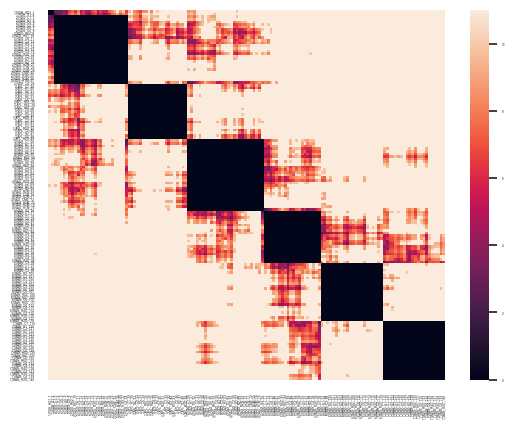

In [13]:
atom_contact_map(dist_table,size = 0.2)

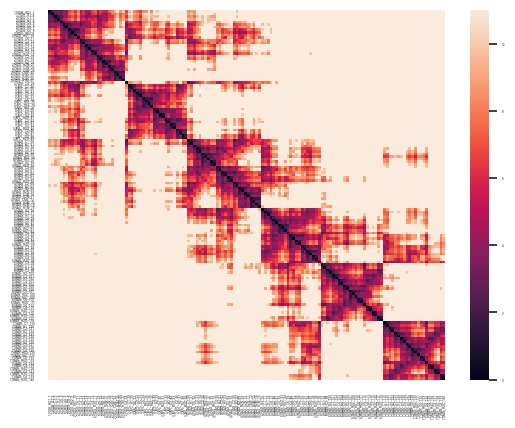

In [14]:
atom_contact_map(inclusive_dist_table,size = 0.2)

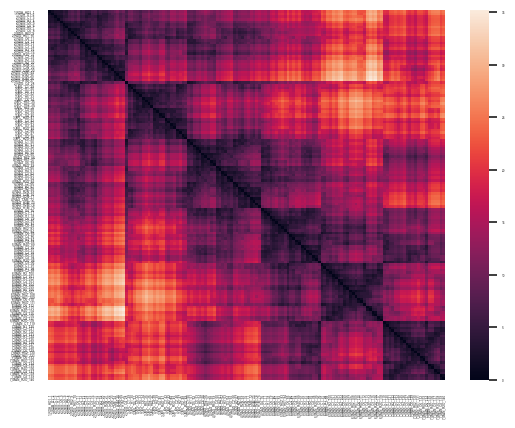

In [15]:
atom_contact_map(all_inclusive_dist_table,size = 0.2)

# Step 6 - Visualizing multiple structures of the same glycan

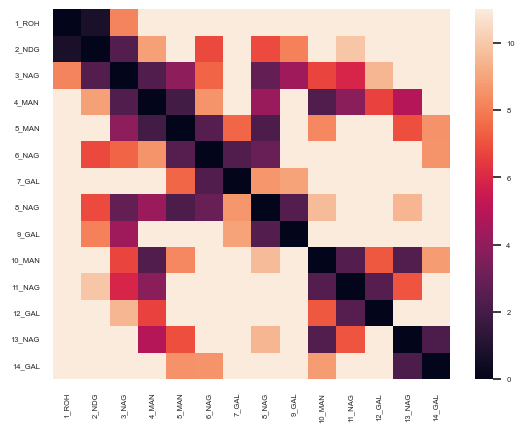

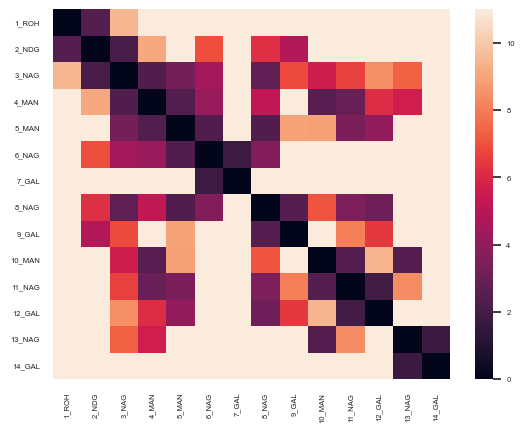

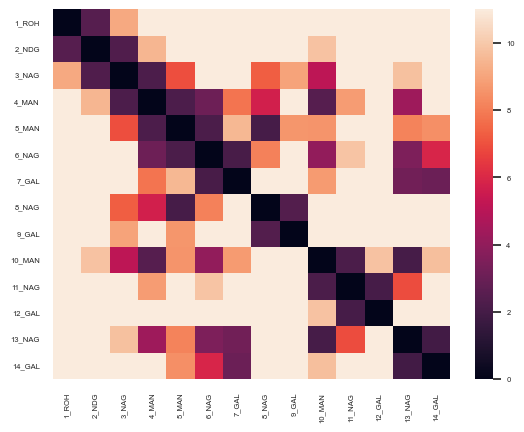

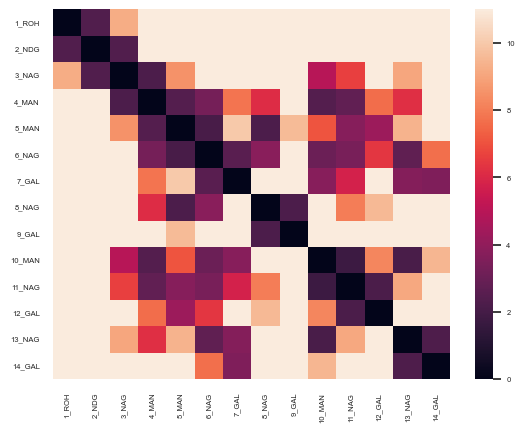

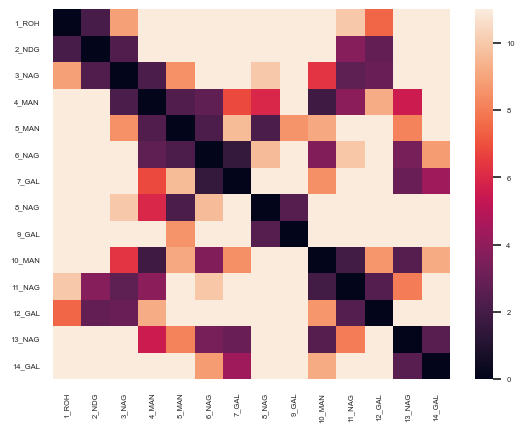

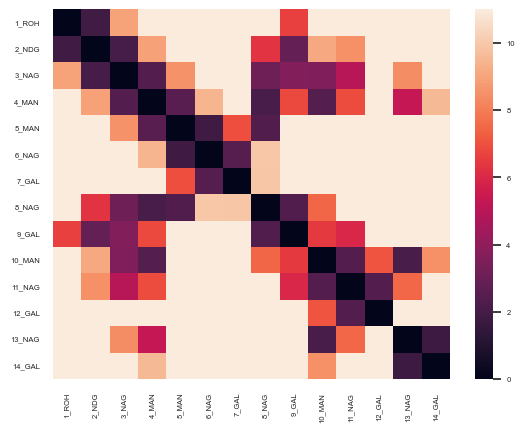

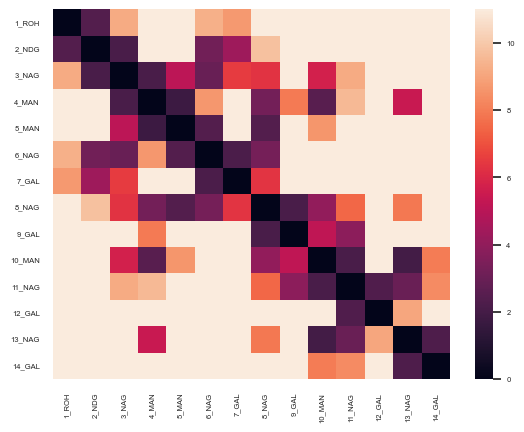

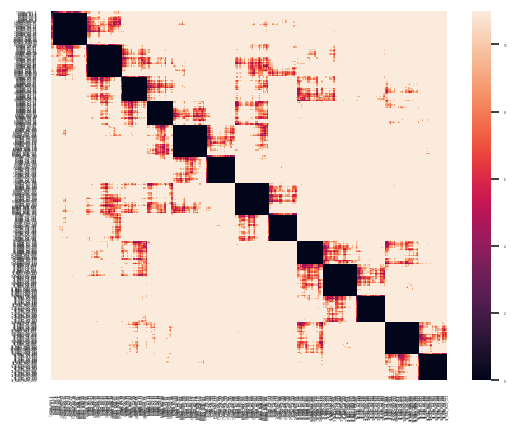

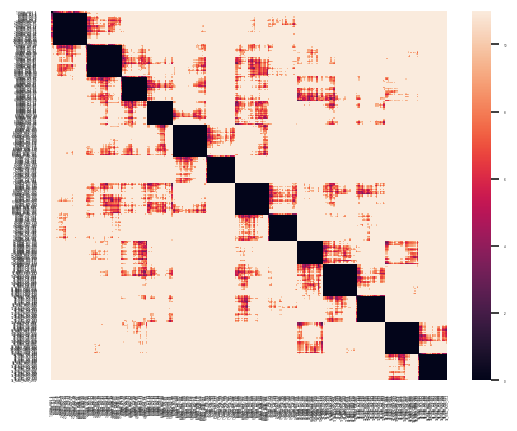

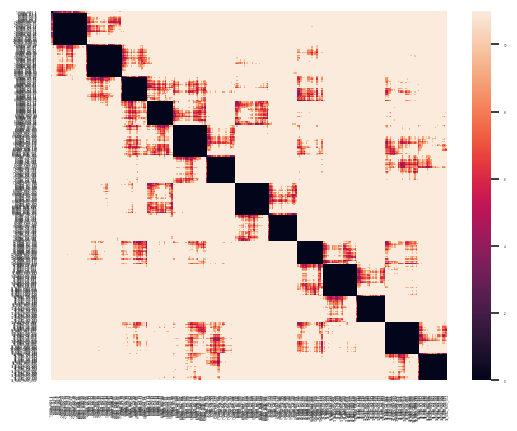

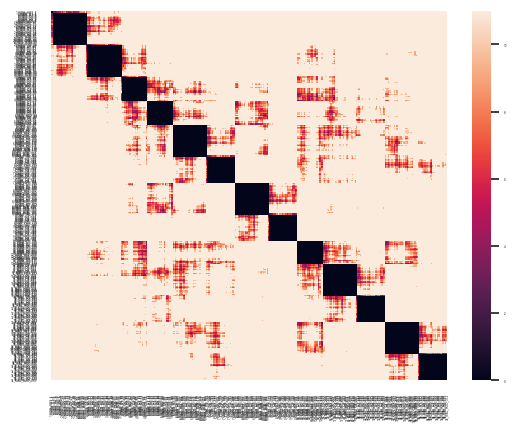

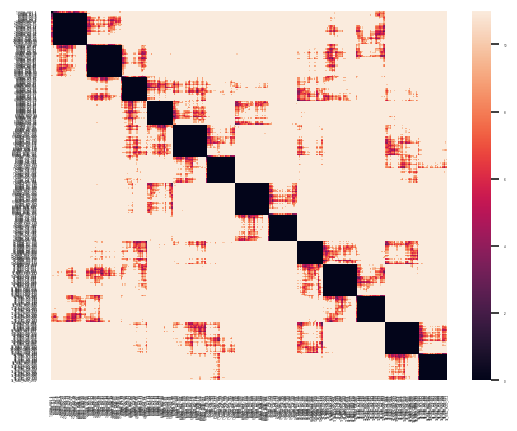

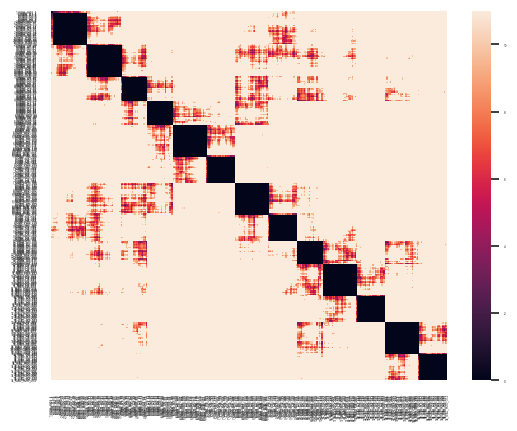

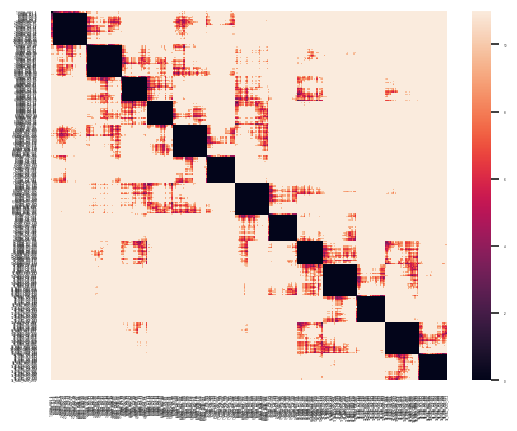

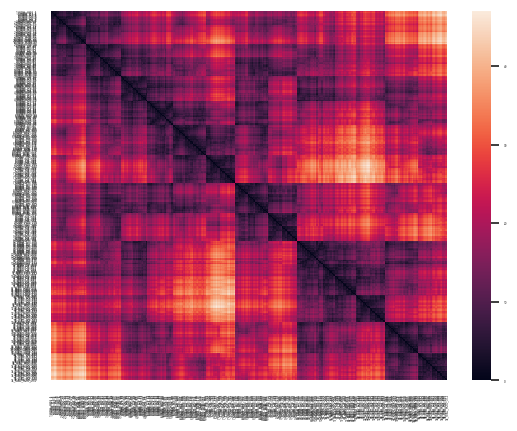

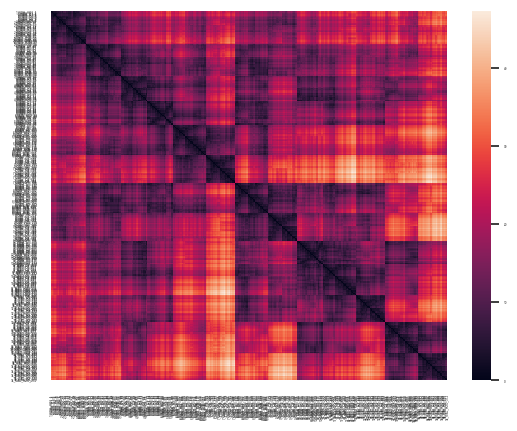

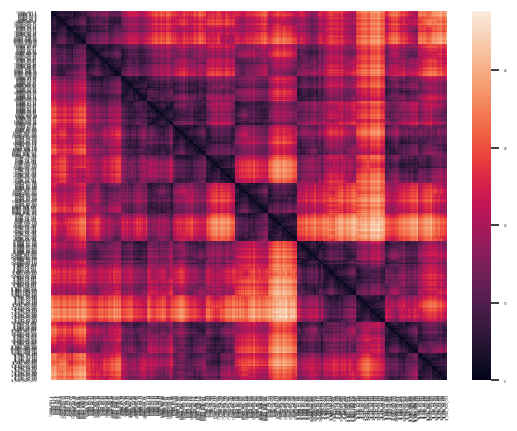

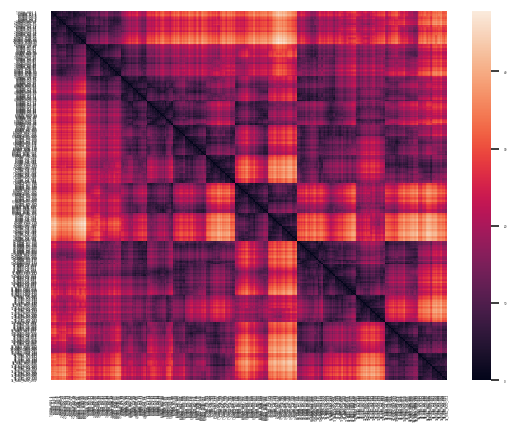

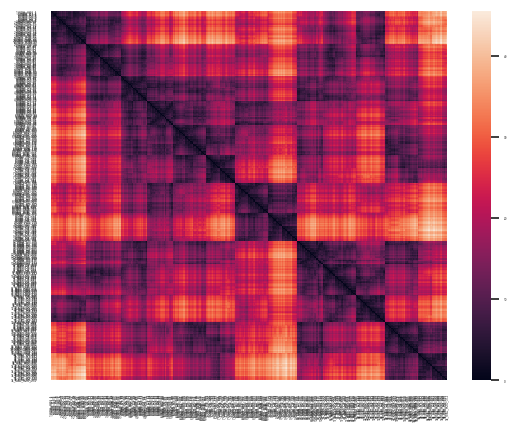

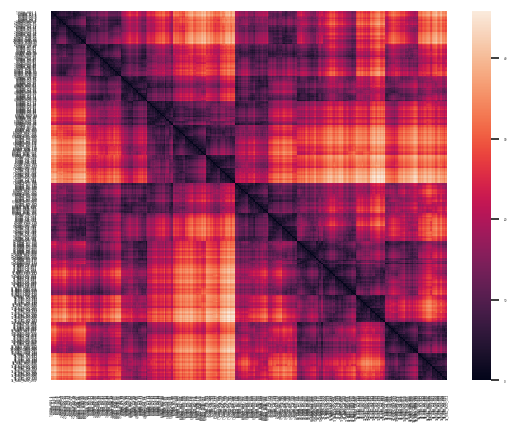

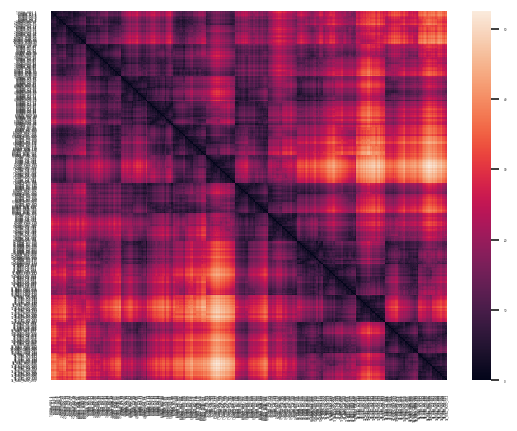

In [16]:
# For a given glycan, multiple structures (or clusters) were determined.
# It is therefore possible to generate multiple maps and create a gif to visualize them

# Monosaccharide maps are exported
for x in range(0,7) :
    f = 'PDB_format_ATOM3/Gal(b1-4)GlcNAc(b1-6)[Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)[Gal(b1-4)GlcNAc(b1-4)[Gal(b1-4)GlcNAc(b1-2)]Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc_cluster'+str(x)+'_alpha.PDB.pdb'
    df = extract_3D_coordinates(f)
    dist_table = make_monosaccharide_contact_table(df,mode='distance')
    monosaccharide_contact_map(dist_table, export=str(x)+'_res.png')

# Similarly, atomic maps are exported
for x in range(0,7) :
    f = 'PDB_format_ATOM3/Gal(b1-4)GlcNAc(b1-6)[Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)[Gal(b1-4)GlcNAc(b1-4)[Gal(b1-4)GlcNAc(b1-2)]Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc_cluster'+str(x)+'_alpha.PDB.pdb'
    df = extract_3D_coordinates(f)
    dist_table = make_atom_contact_table(df,mode='exclusive')
    atom_contact_map(dist_table, export=str(x)+'_atom.png',size = 0.2)

# Atomic maps without distance threshold
for x in range(0,7) :
    f = 'PDB_format_ATOM3/Gal(b1-4)GlcNAc(b1-6)[Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)[Gal(b1-4)GlcNAc(b1-4)[Gal(b1-4)GlcNAc(b1-2)]Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc_cluster'+str(x)+'_alpha.PDB.pdb'
    df = extract_3D_coordinates(f)
    dist_table = make_atom_contact_table(df,mode='inclusive', threshold=200)
    atom_contact_map(dist_table, export=str(x)+'_atom_full.png',size = 0.2)


In [17]:
# Creating gifs

make_gif(prefix= 'monosaccharide',suffix= 'res')
make_gif(prefix= 'atom',suffix= 'atom')
make_gif(prefix= 'full',suffix= 'full')

# Step 7 - Determination of stable monosaccharide/atom pairs across structural clusters

### Explanations
Two methods can be specified to determine monosaccharide/atom stability across structural clusters.

1. For each pairs of entities pE (monosaccharide or atom) of each structure S, distances D are averaged. So in case we have 3 structures S1, S2, S3, the distance D between the first pair of entity D(pE1) is averaged across structures : (D(pE1<sup>S1</sup>) + D(pE1<sup>S2</sup>) + D(pE1<sup>S3</sup>))/3. Then, the sum of the absolute difference between pE1<sup>S1</sup>, pE1<sup>S2</sup>, pE1<sup>S3</sup>, and the average, is computed : SUM(|pE1<sup>S1</sup> - average|, |pE1<sup>S2</sup> - average|, |pE1<sup>S3</sup> - average|). This value is the used as the instability score for the given pair of entities pE1.
2. The second method (amplify) is similar but in the last step, we use the power 2 of the instability score instead.

In [18]:
# read all structures and get contact maps

dfs = []
atom_dfs = []
for x in range(0,7) :
    f = 'PDB_format_ATOM3/Gal(b1-4)GlcNAc(b1-6)[Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)[Gal(b1-4)GlcNAc(b1-4)[Gal(b1-4)GlcNAc(b1-2)]Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc_cluster'+str(x)+'_alpha.PDB.pdb'
    df = extract_3D_coordinates(f)
    dist_table = make_monosaccharide_contact_table(df,mode='distance', threshold = 200)
    atom_dist_table = make_atom_contact_table(df,mode='inclusive', threshold = 200)
    dfs.append(dist_table)
    atom_dfs.append(atom_dist_table)

# from the contact maps, compute standard and amplified inter-structure variability tables
isvt_amplified = inter_structure_variability_table(dfs, 'amplify')
isvt = inter_structure_variability_table(dfs)

atom_isvt_amplified = inter_structure_variability_table(atom_dfs, 'amplify')
atom_isvt = inter_structure_variability_table(atom_dfs)

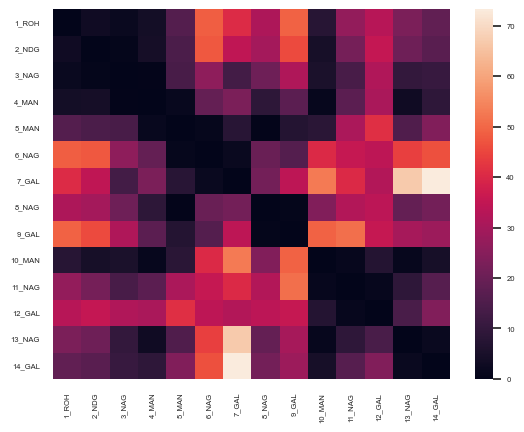

In [19]:
# The darker, the most stable across structures.
monosaccharide_contact_map(isvt)

<Axes: >

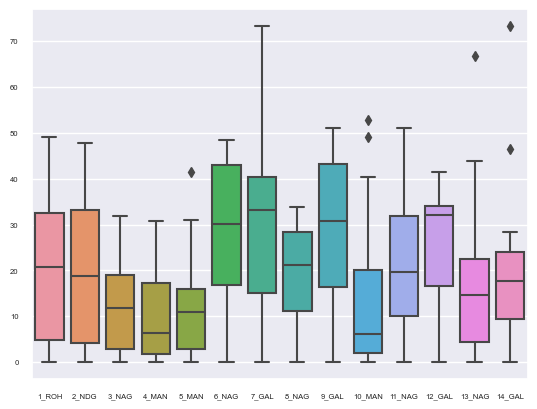

In [20]:
# monosaccharide instability can also be visualized through seaborn boxplots
sns.boxplot(isvt)

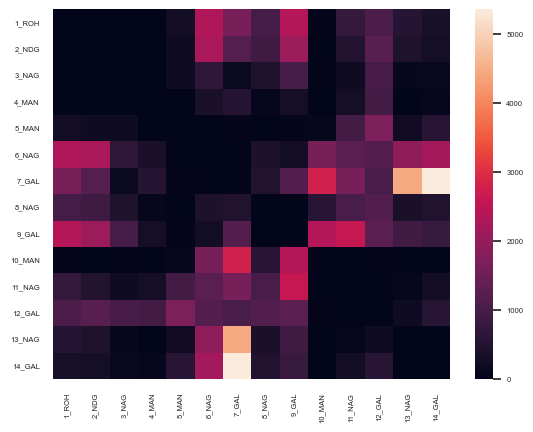

In [21]:
# Differences in terms of stability are exacerbated with the amplified mode
monosaccharide_contact_map(isvt_amplified)

<Axes: >

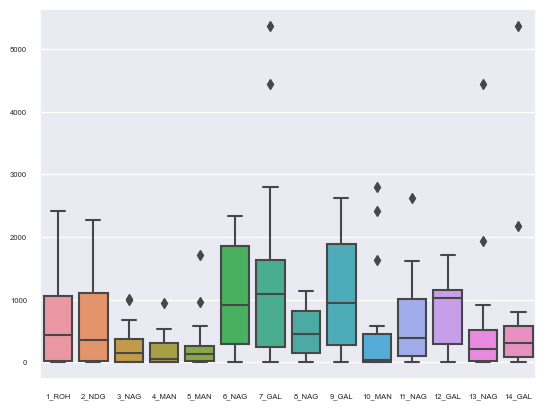

In [22]:
# Differences in terms of stability are exacerbated with the amplified mode also in the boxplots
sns.boxplot(isvt_amplified)

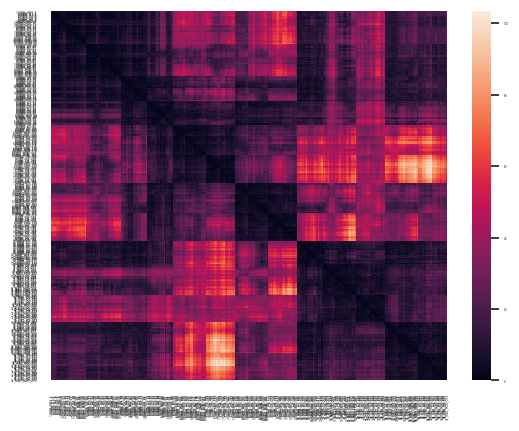

In [23]:
# Atom contact maps are higher-resolution versions of monosaccharide contact maps
atom_contact_map(atom_isvt,size =0.2)

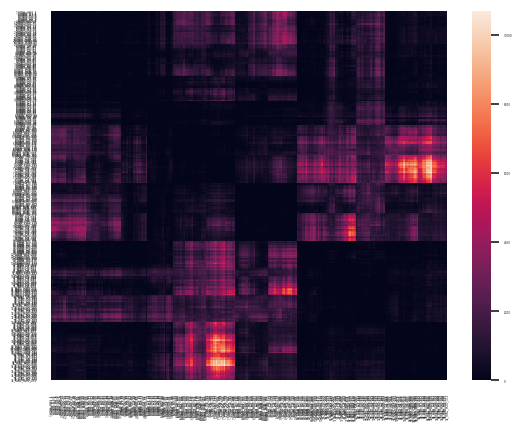

In [24]:
atom_contact_map(atom_isvt_amplified,size =0.2)

In [25]:
# We can search for the most stable and unstable monosaccharides, here 4_MAN and 7_GAL respectively

residue_overall_stability = {}
for c in isvt.columns.to_list():
    residue_overall_stability[c] = sum(isvt[c].to_list())

residue_overall_stability

{'1_ROH': 303.31828571428565,
 '2_NDG': 279.1711428571428,
 '3_NAG': 180.114,
 '4_MAN': 139.42028571428563,
 '5_MAN': 182.02999999999997,
 '6_NAG': 380.7185714285714,
 '7_GAL': 441.6614285714286,
 '8_NAG': 264.0117142857143,
 '9_GAL': 395.73171428571425,
 '10_MAN': 206.9628571428571,
 '11_NAG': 298.2062857142857,
 '12_GAL': 354.2282857142857,
 '13_NAG': 257.8974285714285,
 '14_GAL': 295.4794285714285}

In [26]:
# Similarly, we can search for the most stable and unstable atoms, here 4_MAN_O6_65 and 7_GAL_H4O_137 respectively

residue_overall_stability = {}
for c in atom_isvt.columns.to_list():
    residue_overall_stability[c] = sum(atom_isvt[c].to_list())

residue_overall_stability

{'1_ROH_HO1_1': 7528.2228571428595,
 '1_ROH_O1_2': 7602.3188571428545,
 '2_NDG_C1_3': 7412.1474285714285,
 '2_NDG_H1_4': 7504.0068571428565,
 '2_NDG_O5_5': 7193.354857142859,
 '2_NDG_C5_6': 6912.859142857139,
 '2_NDG_H5_7': 6965.3654285714265,
 '2_NDG_C6_8': 6984.79428571429,
 '2_NDG_H62_9': 7344.570571428572,
 '2_NDG_H61_10': 7126.570285714283,
 '2_NDG_O6_11': 7652.049142857141,
 '2_NDG_H6O_12': 8157.637428571429,
 '2_NDG_C4_13': 6745.241142857142,
 '2_NDG_H4_14': 6745.398571428573,
 '2_NDG_C3_15': 7095.177428571425,
 '2_NDG_H3_16': 7337.262571428576,
 '2_NDG_O3_17': 6972.922285714289,
 '2_NDG_H3O_18': 6904.137714285711,
 '2_NDG_C2_19': 7390.721428571432,
 '2_NDG_H2_20': 7373.345714285709,
 '2_NDG_N2_21': 7638.005142857142,
 '2_NDG_H2N_22': 7768.688857142859,
 '2_NDG_C2N_23': 7764.690000000004,
 '2_NDG_O2N_24': 7852.133142857143,
 '2_NDG_CME_25': 8038.787714285718,
 '2_NDG_H3M_26': 8083.530857142856,
 '2_NDG_H2M_27': 8524.097142857145,
 '2_NDG_H1M_28': 8381.58142857143,
 '2_NDG_O4_29'

# Step 8 - From PDB to Pearson correlations

10


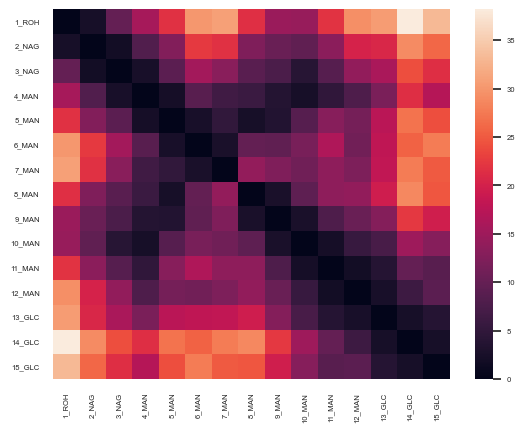

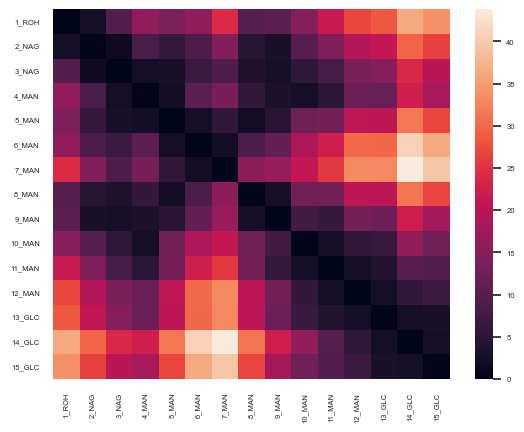

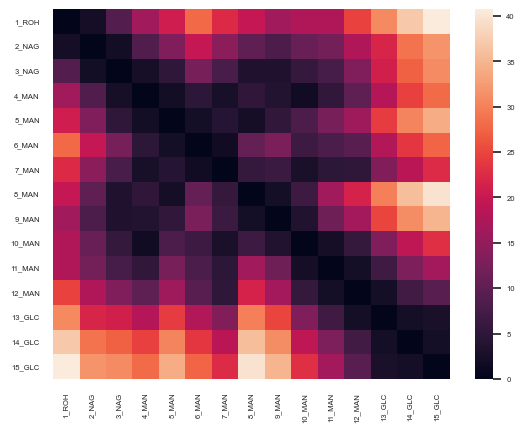

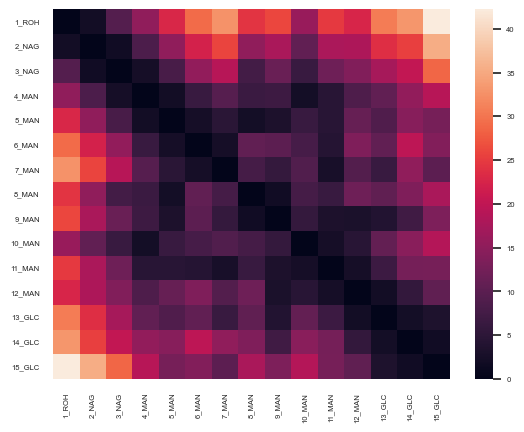

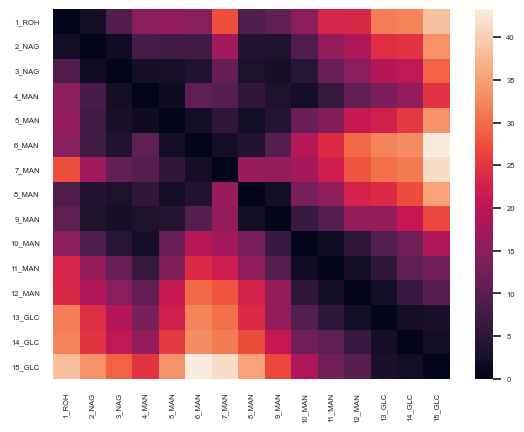

In [32]:

dfs = []
atom_dfs = []

p = 'PDB_format_ATOM7/' # Glc(a1-2)Glc(a1-3)Glc(a1-3)Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-2)Man(a1-3)[Man(a1-2)Man(a1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
directory = os.listdir(p)
x=0
print(len(directory))
for f in directory :
    if 'beta' in f :
        df = extract_3D_coordinates(p+f)
        dist_table = make_monosaccharide_contact_table(df,mode='distance', threshold = 200)
        monosaccharide_contact_map(dist_table, export=str(x)+'_ATOM7.png')
        dfs.append(dist_table)
        x+=1

In [28]:
# from the contact maps, compute standard and amplified inter-structure variability tables
isvt = inter_structure_variability_table(dfs)
isvt_amplified = inter_structure_variability_table(dfs, 'amplify')

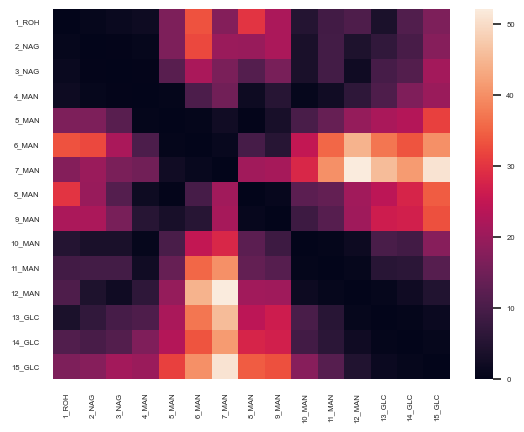

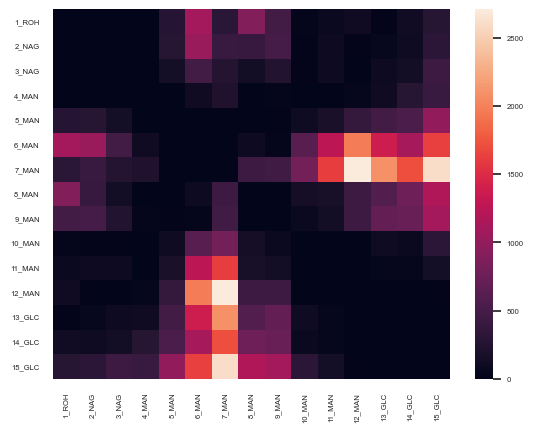

<Axes: >

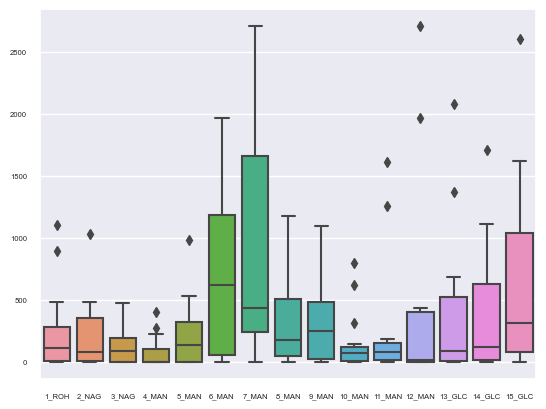

In [29]:
monosaccharide_contact_map(isvt)
monosaccharide_contact_map(isvt_amplified)
sns.boxplot(isvt_amplified)

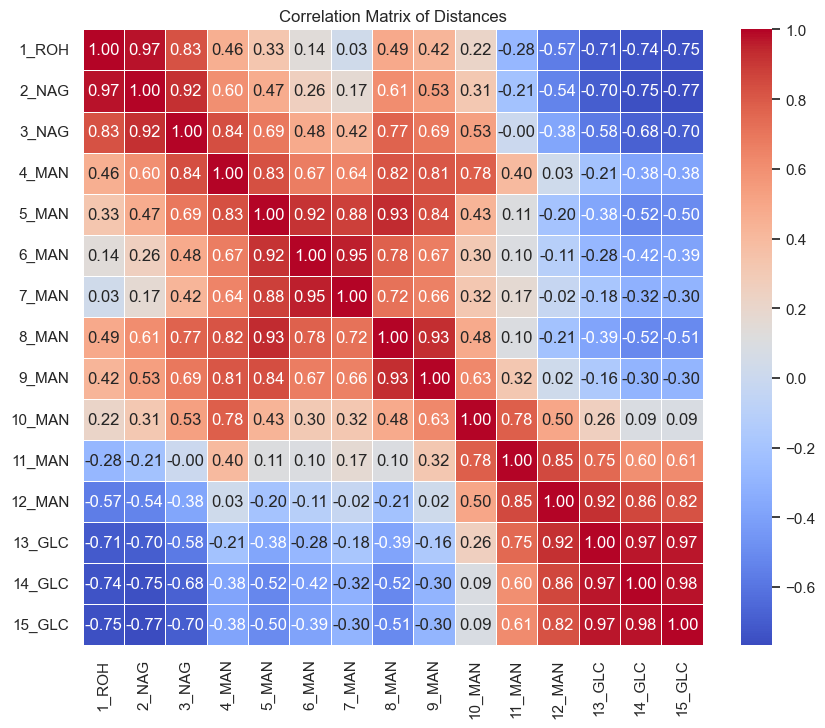

In [30]:
# Computing the correlation matrix and displaying it as a heatmap

mx = make_correlation_matrix(dfs)
show_correlations(mx)

# On the map, high values (red) between the relative distances of a pair of residues compared to all other residues. 
# 0 (white) means no correlation
# Low negative values (blue) mean anti-correlations
# Here, the terminal Glc(a1-2)Glc(a1-3)Glc(a1-3)Man(a1-2)Man(a1-2) part of the glycan shows a strong intra-correlation 
# but no positive correlation to the rest of the molecule, suggesting its structural independancy


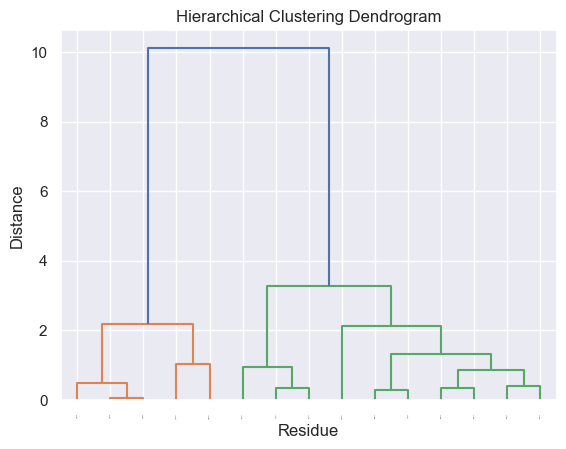

In [31]:
# clustering of correlated residues
show_correlation_dendrogram(mx)